In [70]:
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests
import datetime
import time

In [71]:
# VARIABLES

sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'

# Wikidata requires a user agent header to prevent spam requests
user_agent = 'Paintings_conference_bot/0.0 (https://github.com/Pgxe9zu1/catalogue-003; lisa.sommer@stud.hs-hannover.de)'

# SPARQL query
# see in Wikidata's Query Service GUI at:
# https://www.wikidata.org/wiki/
query = """
#defaultView:ImageGrid
SELECT DISTINCT ?itemLabel ?Bild ?taxon_rang ?taxon_rangLabel ?übergeordnetes_Taxon ?übergeordnetes_TaxonLabel  ?described_at_URL ?Gefährdungsstufe__IUCN_ ?Gefährdungsstufe__IUCN_Label WHERE {
  ?item wdt:P31 wd:Q16521;
    wdt:P195 wd:Q119251813;
    wdt:P18 ?Bild.
  OPTIONAL {
    ?item wdt:P171 ?übergeordnetes_Taxon;
      wdt:P105 ?taxon_rang;
      wdt:P141 ?Gefährdungsstufe__IUCN_;
      wdt:P973 ?described_at_URL;
      p:P973 ?statement.
    ?statement ps:P973 ?described_at_URL;
      pq:P407 ?language.
  }
  FILTER(?language != wd:Q102114802)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". }
}
LIMIT 9
"""

In [72]:
# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

Title: Bravaisia berlandieriana

Taxon Parent: Bravaisia

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B101181698

Gefährdungsstufe: http://www.wikidata.org/entity/Q211005



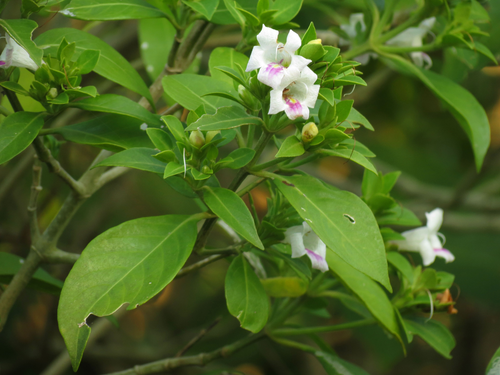




Title: Cordia dodecandra

Taxon Parent: Kordien

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B100031878

Gefährdungsstufe: http://www.wikidata.org/entity/Q211005



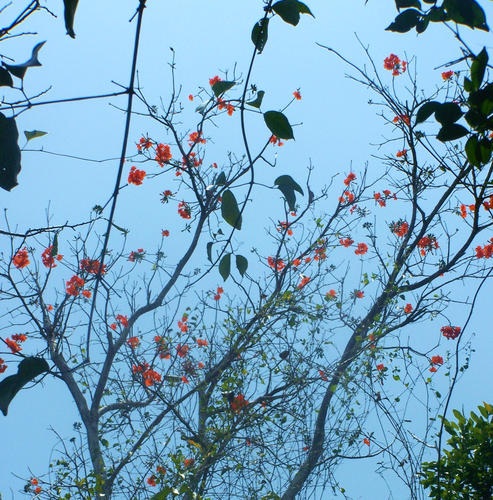




Title: Neocallitropsis pancheri

Taxon Parent: Neocallitropsis

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B100052427

Gefährdungsstufe: http://www.wikidata.org/entity/Q11394



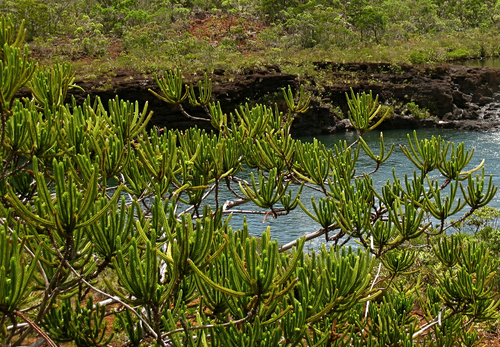




Title: Widdringtonia whytei

Taxon Parent: Widdringtonia

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B100019851

Gefährdungsstufe: http://www.wikidata.org/entity/Q219127



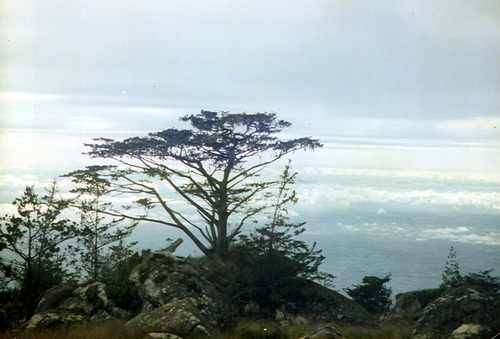




Title: Astragalus crassicarpus

Taxon Parent: Tragant

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B180006231

Gefährdungsstufe: http://www.wikidata.org/entity/Q211005



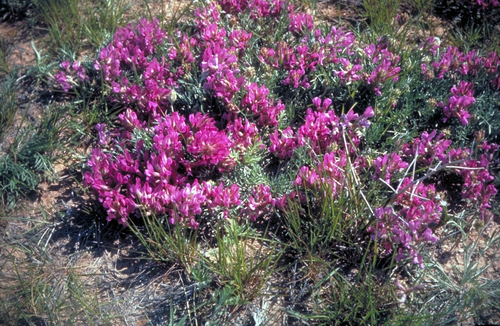




Title: Pinus bungeana

Taxon Parent: Pinus subsect. Gerardianae

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B101063552

Gefährdungsstufe: http://www.wikidata.org/entity/Q211005



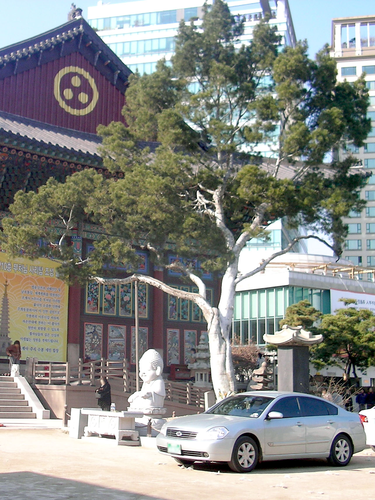




Title: Diospyros texana

Taxon Parent: Diospyros

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B101160752

Gefährdungsstufe: http://www.wikidata.org/entity/Q211005



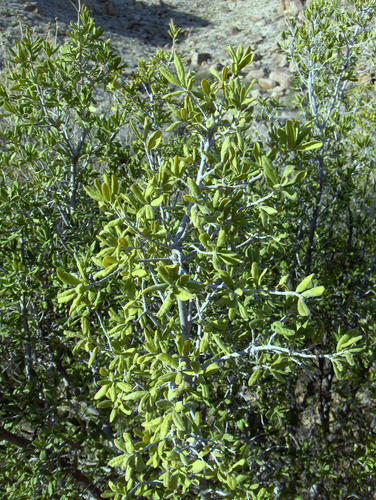




Title: Pfahlrohr

Taxon Parent: Arundo

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/BW02221020

Gefährdungsstufe: http://www.wikidata.org/entity/Q211005



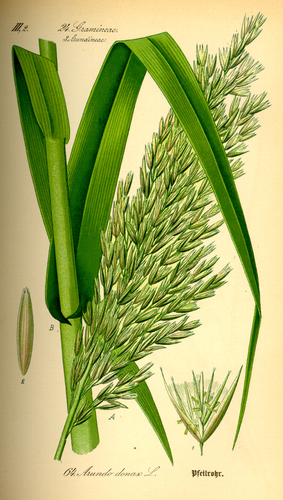




Title: Pinus bungeana

Taxon Parent: Kiefern

Taxon Rank: Art

JACQ link: http://herbarium.bgbm.org/object/B101063552

Gefährdungsstufe: http://www.wikidata.org/entity/Q211005



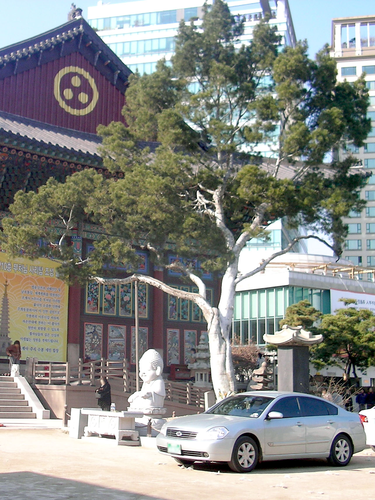

In [73]:
# MAIN PROGRAM

# create SPARQL query
sparql = SPARQLWrapper(sparql_endpoint_url, agent=user_agent)

# retrieve results and convert to JSON format
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

# for each result, print various data fields
for result_item in result['results']['bindings']:
    print('Title: ' + result_item['itemLabel']['value'] + '\n')
    print('Taxon Parent: ' + result_item['übergeordnetes_TaxonLabel']['value'] + '\n')
    print('Taxon Rank: ' + result_item['taxon_rangLabel']['value'] + '\n')
    print('JACQ link: ' + result_item['described_at_URL']['value'] + '\n')
    print('Gefährdungsstufe: ' + result_item['Gefährdungsstufe__IUCN_']['value'] + '\n')
    
    # get image from image URL and display resized version
    image_url = result_item['Bild']['value']
    headers = {'User-Agent': user_agent}
    im = get_image(image_url, headers)
    if im:
        im.thumbnail((500, 500), Image.Resampling.LANCZOS)
        display(im)
    else:
        print('Image not found')
    print('\n\n')